# Cubic Regularization

1. Examples on simple functions
2. Quadratic objective with quadratic equality constraints
3. Solving the auxiliary problem

References:
* Nesterov, Y., & Polyak, B. T. (2006). Cubic regularization of Newton method and its global performance.
  Mathematical Programming, 108(1), 177-205.
* https://github.com/cjones6/cubic_reg

In [1]:
import src.example
import numpy as np

### 1 Examples
A few convex and non-convex functions are solved using two available methods for the auxiliary one-dimensional problem, more functions can be found and tested in <em>example.py</em>.

Value of function at argmin: 4.66401736973887e-26
Argmin of function: [1.52709158e-13 1.52709158e-13]
Number of iterations: 2


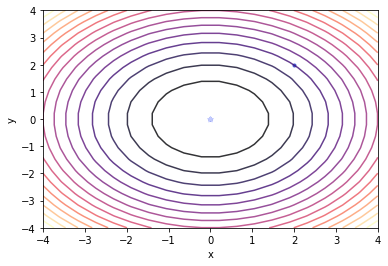

In [2]:
# Minimizing a convex quadratic function using the monotone norm method to solve the auxiliary problem.
src.example.main(function='quadratic', aux_method='monotone_norm')

Value of function at argmin: -3.0
Argmin of function: [2.95533678e-15 1.00000000e+00]
Number of iterations: 6


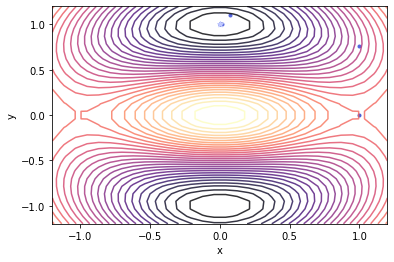

In [3]:
# Minimizing a bimodal function using the trust region method to solve the auxiliary problem, starting at a saddle point.
src.example.main(function='bimodal', aux_method='trust_region')

Value of function at argmin: 5.127595883936577e-30
Argmin of function: [1. 1.]
Number of iterations: 21


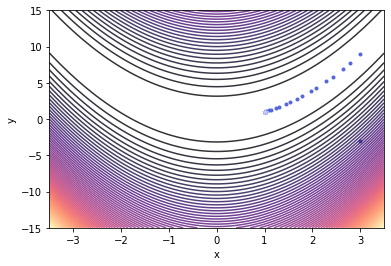

In [4]:
# Minimizing the non-convex Rosenbrock banana function with global minimum at (1,1).
src.example.main(function='banana', aux_method='trust_region')

Value of function at argmin: 3.9968028886505635e-15
Argmin of function: [-9.37584556e-16 -3.28705442e-16]
Number of iterations: 12


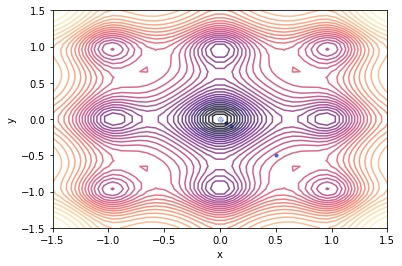

In [5]:
# Minimizing the Ackley non-convex function.
src.example.main(function='ackley', aux_method='monotone_norm')

### 2 Quadratic objective
Minimizing a quadratic objective with quadratic equality constraints.

### 3 Auxiliary problem
<strong>Trust region</strong> and <strong>Monotone norm</strong> methods are compared for solving the one dimensional auxiliary problem as described in <em>Nesterov, Y., & Polyak, B. T. (2006)</em>.

Did not converge to a local minimum, likely a saddle point.


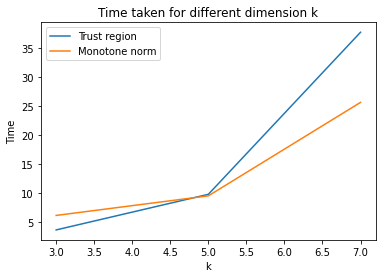

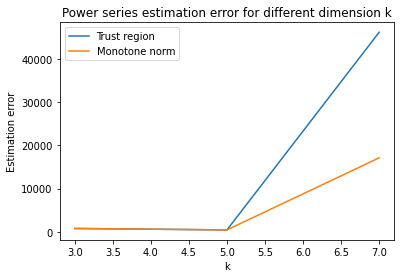

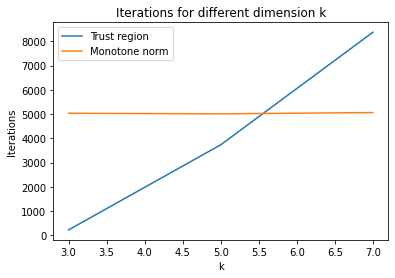

In [7]:
%%capture
%run src/test_aux_methods.py

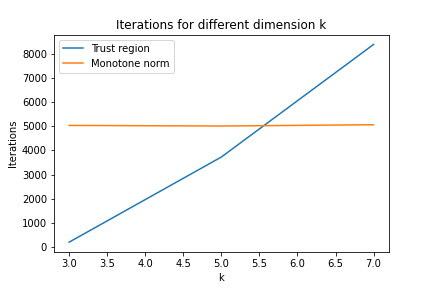

In [11]:
from IPython.display import Image
Image(filename='figures/iterations_aux_methods.png')

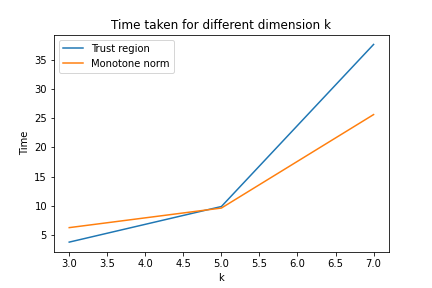

In [10]:
Image(filename='figures/time_aux_methods.png')

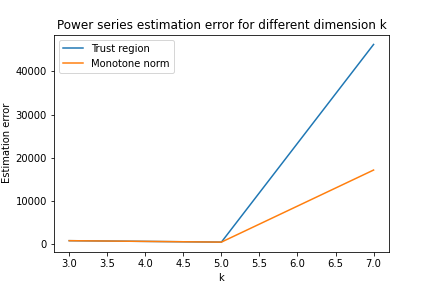

In [12]:
Image(filename='figures/value_aux_methods.png')